# Analýza časových řad 2 - výnosy a vizualizace

## Informace o notebooku a modulech

In [1]:
MY_VERSION = 1,0

import sys
import datetime
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as pdr_web
import quandl as ql
from matplotlib import __version__ as matplotlib_version
from seaborn import __version__ as seaborn_version

# Load Quandl API key
import json
with open('quandl_key.json','r') as f:
    quandl_api_key = json.load(f)
ql.ApiConfig.api_key = quandl_api_key['API-key']

print('Verze notebooku:', '.'.join(map(str, MY_VERSION)))
print('Verze pythonu:', ".".join(map(str, sys.version_info[0:3])))
print('---')
print('NumPy:', np.__version__)
print('Pandas:', pd.__version__)
print('pandas-datareader:', pdr.__version__)
print('Quandl:', ql.version.VERSION)
print('Matplotlib:', matplotlib_version)
print('Seaborn:', seaborn_version)

Verze notebooku: 1.0
Verze pythonu: 3.6.1
---
NumPy: 1.13.0
Pandas: 0.20.2
pandas-datareader: 0.4.0
Quandl: 3.1.0
Matplotlib: 2.0.2
Seaborn: 0.7.1


## Seznam zdrojů:
1. [Pandas - manipulace a analýza dat](https://pandas.pydata.org/)
+ [pandas-datareader](https://github.com/pydata/pandas-datareader)
+ [Seznam všech webových zdrojů v pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html)
+ [Python For Finance: Algorithmic Trading](https://www.datacamp.com/community/tutorials/finance-python-trading)
+ [Quandl](https://www.quandl.com/)
+ [ETF trhy - finančník](http://www.financnik.cz/komodity/financnik/trhy-podrobneji-etfs.html)
+ [Matplotlib](https://matplotlib.org/)
+ [Seaborn](https://seaborn.pydata.org/)

   [1]: https://sourceforge.net/p/jupiter/wiki/markdown_syntax/

# Data ETF trhu americké ropy

In [2]:
start_date = datetime.datetime(2005, 1, 1)
end_date = datetime.datetime(2008, 6, 1)


data = pdr_web.DataReader("NYSEARCA:USO", 'google', start=start_date, end=end_date)
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-04-10,68.25,68.50,67.67,68.02,3877300
2006-04-11,68.32,68.39,67.30,68.20,1290900
2006-04-12,68.22,68.81,67.81,67.84,1243700
2006-04-13,67.50,68.99,67.40,68.82,557200
2006-04-17,69.20,69.90,68.68,69.79,903000


# Základní vizualizace dat

`Pandas` má integrovanou funkcionalitu s `matplotlib`, vizualizace dat je pak velmi jednoduchá.

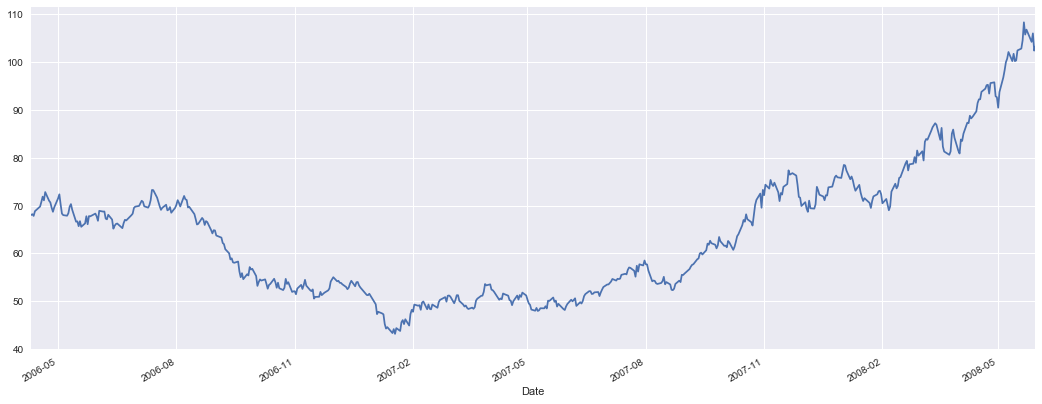

In [3]:
import matplotlib.pyplot as plt
#data['Close'].plot()
data['Close'].plot(figsize=(18, 7), grid=True)
plt.show()

Knihovna `seaborn` je nadstavba nad knihovou `matplotlib`, která poskytuje graficky přehlednější vzhled pro statistická data. [Internetové stránky projektu Seaborn](https://seaborn.pydata.org/).

# Denní změna v procentech

Ke zjištění denní procentní změny lze použít funkci `pct_change`, kterou lze nalézt v [dokumentaci](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.pct_change.html).

In [4]:
daily_pct_change = data['Close'].pct_change()
# nahrazení hodnota NA za nulu
daily_pct_change.fillna(0, inplace=True)
daily_pct_change.head()

Date
2006-04-10    0.000000
2006-04-11    0.002646
2006-04-12   -0.005279
2006-04-13    0.014446
2006-04-17    0.014095
Name: Close, dtype: float64

Pro lepší přehled výnosů v čase se bude hodit růst v logaritmickém měřítku. Využije se zde knihovny `NumPy` a její funkce `log`.

In [5]:
#daily_log_returns = np.log(data['Close'].pct_change()+1)
daily_log_returns = np.log(daily_pct_change+1)
daily_log_returns.head()

Date
2006-04-10    0.000000
2006-04-11    0.002643
2006-04-12   -0.005293
2006-04-13    0.014342
2006-04-17    0.013996
Name: Close, dtype: float64

## Změna v procentech pro jiné období

Nejprve pomocí funkce `resample` získám vzorek dat po měsíci, pak mohu zjistit procentní změnu přes `pct_change`.

In [6]:
monthly = data.resample('BM').apply(lambda x: x[-1])
monthly_pct = monthly['Close'].pct_change()
print(monthly_pct.head())

quarter = data.resample("4M").mean()
quarter_pct = quarter.pct_change()
quarter_pct.head()

Date
2006-04-28         NaN
2006-05-31   -0.027147
2006-06-30    0.030120
2006-07-31   -0.003583
2006-08-31   -0.067894
Freq: BM, Name: Close, dtype: float64


,Open,High,Low,Close,Volume
Date,,,,,
2006-04-30,NaN,NaN,NaN,NaN,NaN
2006-08-31,-0.019255,-0.022557,-0.020939,-0.021794,-0.526996
2006-12-31,-0.203368,-0.202443,-0.204303,-0.204698,1.948874
2007-04-30,-0.096910,-0.094456,-0.097852,-0.095246,1.298343
2007-08-31,0.067337,0.064428,0.070736,0.068871,-0.327101


## Alternativa k `pct_change`

Někdy ale nemusí být zcela jasné, jak `pct_change` změnu počítá, tak přichází na řadu funkce **`shift`**.

In [7]:
daily_pct_change = data['Close'] / data['Close'].shift(1) - 1
print(daily_pct_change.head())
daily_log_returns_shift = np.log(data['Close'] / data['Close'].shift(1))
daily_log_returns_shift.head()

Date
2006-04-10         NaN
2006-04-11    0.002646
2006-04-12   -0.005279
2006-04-13    0.014446
2006-04-17    0.014095
Name: Close, dtype: float64


Date
2006-04-10         NaN
2006-04-11    0.002643
2006-04-12   -0.005293
2006-04-13    0.014342
2006-04-17    0.013996
Name: Close, dtype: float64

## Graf distribuce denního procentního zhodnocení

Funkce `hist` připraví graf histogramu z `matplotlib`. Funkce `describe` v podstatě popisuje tento histogram.

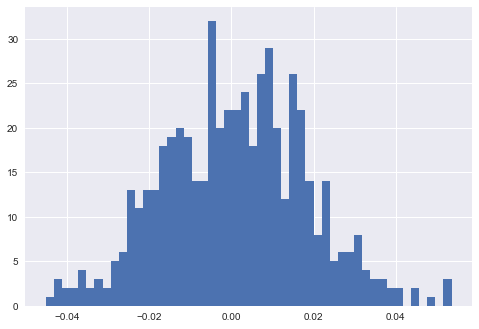

count    538.000000
mean       0.000928
std        0.017510
min       -0.045244
25%       -0.012033
50%        0.001261
75%        0.013321
max        0.053638
Name: Close, dtype: float64


In [8]:
# bins = počet zobrazených hodnot/sloupců, což určuje jemnost grafu
daily_pct_change.hist(bins=50)
plt.show()
print(daily_pct_change.describe())

# Kumulativní denní míra návratnosti/rentabilita

Je užitečná pro stanovení hodnoty investice v pravidelných intervalech a vypočítá ji funkce `cumprod`, [dokumentace k `cumprod`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.cumprod.html).

In [9]:
cum_daily_return = (1 + daily_pct_change).cumprod()
print(cum_daily_return.tail())

Date
2008-05-23    1.568656
2008-05-27    1.531167
2008-05-28    1.557189
2008-05-29    1.504263
2008-05-30    1.517348
Name: Close, dtype: float64


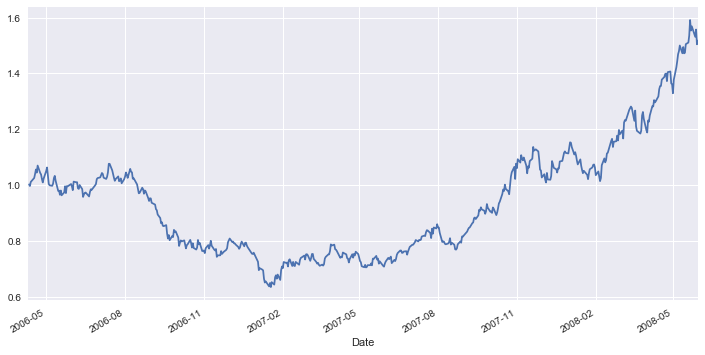

In [10]:
cum_daily_return.plot(figsize=(12,6))
plt.show()

*Nebo na měsíční kumulatvní návratnost*

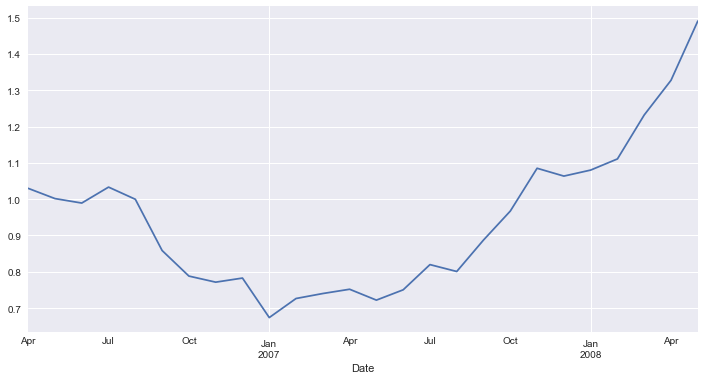

In [11]:
cum_monthly_return = cum_daily_return.resample("M").mean()
cum_monthly_return.plot(figsize=(12,6))
plt.show()

# Závěr

[Matplotlib](https://matplotlib.org) je velmi mocný nástroj pro zobrazování grafů, kde [Seaborn](https://seaborn.pydata.org) vylepšuje jeho vzhled statistických údajů. Výhoda pandas je, že již obsahuje vestavěné funkce, které dělají zobrazování dat ještě jednodušší.